# TME: Introduction to Numpy (and Matplotlib) for Quantum Information

This notebook is a guided exploration of Numpy for quantum physicists and computer scientists.
It introduces key linear algebraic operations you’ll use throughout the rest of the course,
including in the Bloch sphere and quantum gates sessions.

In the previous TMEs, you implemented linear algebra operations manually using lists of lists (ndlist), in order to understand the mathematical structure behind vectors, matrices, and tensor products.

Starting now, we will use NumPy, a powerful numerical library optimized for matrix operations, complex numbers, and scientific computing.

By the end of this session, you should be able to:

- Represent kets, bras, and operators with NumPy arrays
- Perform matrix and vector operations (@, .T, .conj().T, etc.)
- Compute tensor products with np.kron
- Understand and use matrix exponential for quantum evolution
- Distinguish between element-wise and matrix operations

We will also introduce Matplotlib for basic plotting, which will be useful for visualizing quantum states and operations in later TMEs.

## 1. Getting Started with NumPy

First, ensure you have NumPy installed. If you're using a Jupyter notebook, you can install it via pip:
> ```!pip install numpy```

In [95]:
import numpy as np

from typing import List

import math

NumPy provides a powerful N-dimensional array object called `ndarray`. You can create arrays from Python lists or tuples using the `np.array()` function.

In [96]:
# A simple ket |0⟩ and |1⟩
ket0 = np.array([[1], [0]], dtype=complex)
ket1 = np.array([[0], [1]], dtype=complex)

# Display them
print("ket0 =\n", ket0)
print("ket1 =\n", ket1)

# A matrix, e.g. Pauli-X
X = np.array([[0, 1],
              [1, 0]], dtype=complex)
print("X =\n", X)

ket0 =
 [[1.+0.j]
 [0.+0.j]]
ket1 =
 [[0.+0.j]
 [1.+0.j]]
X =
 [[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


Pay attention to the syntax: double brackets `[[...]]` are used to create column vectors (kets) and matrices, while single brackets `[...]` create 1D arrays.
Using `dtype=complex` ensures that the arrays can handle complex numbers, which are essential in quantum mechanics.
The different dtypes available in NumPy are documented [here](https://numpy.org/doc/stable/user/basics.types.html).

You can access the shape of an array using the `.shape` attribute, and you can perform various operations like transposition and conjugation using methods like `.T` and `.conj()`.

Numpy also provide two useful functions to create arrays of zeros and ones, `np.zeros()` and `np.ones()`.

In [97]:
# Create a 3x3 matrix of zeros
zeros_matrix = np.zeros((3, 3), dtype=complex)
print("3x3 Zeros Matrix:\n", zeros_matrix)
# Create a 2x2 matrix of ones
ones_matrix = np.ones((2, 2), dtype=complex)
print("2x2 Ones Matrix:\n", ones_matrix)

3x3 Zeros Matrix:
 [[0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j]]
2x2 Ones Matrix:
 [[1.+0.j 1.+0.j]
 [1.+0.j 1.+0.j]]


When manipulating NumPy arrays, it’s crucial to understand how memory is shared between variables.

Unlike Python lists, NumPy arrays often return views instead of copies.
That means modifying one array can unexpectedly modify another.

In [98]:
A = np.array([10, 20, 30, 40])
B = A[1:3]  # Slice → this is a *view*, not a copy

print("Before modification:")
print("A =", A)
print("B =", B)

B[0] = 999  # Modifying B also changes A!

print("\nAfter modification:")
print("A =", A)
print("B =", B)

Before modification:
A = [10 20 30 40]
B = [20 30]

After modification:
A = [ 10 999  30  40]
B = [999  30]


To avoid this, you can create a copy of an array using the `.copy()` method.

In [99]:
A = np.array([10, 20, 30, 40])
B = A[1:3].copy()  # Create a copy
B[0] = 999  # Modifying B does NOT change A
print("A =", A)
print("B =", B)

A = [10 20 30 40]
B = [999  30]


## 2. Basic Operations

You can perform various operations on NumPy arrays, such as addition, multiplication, and transposition.
In NumPy, there are two main ways to multiply arrays: element-wise multiplication using `*`, and matrix multiplication using the `@` operator or the `np.dot()` function.

In [100]:
# Addition
ket_plus = ket0 + ket1
print("ket_plus =\n", ket_plus)

# Element-wise multiplication
elementwise_product = ket0 * ket1
print("Element-wise product =\n", elementwise_product)

# Matrix multiplication
matrix_product = X @ ket0
print("Matrix product X|0⟩ =\n", matrix_product)
# Alternatively, using np.dot
matrix_product_dot = np.dot(X, ket0)
print("Matrix product using np.dot X|0⟩ =\n", matrix_product_dot)

ket_plus =
 [[1.+0.j]
 [1.+0.j]]
Element-wise product =
 [[0.+0.j]
 [0.+0.j]]
Matrix product X|0⟩ =
 [[0.+0.j]
 [1.+0.j]]
Matrix product using np.dot X|0⟩ =
 [[0.+0.j]
 [1.+0.j]]


---
**Exercise 1:**

Implement the quantum gates H (Hadamard), X (Pauli-X), Y (Pauli-Y), and Z (Pauli-Z) as NumPy arrays. Verify their action on the basis states |0⟩ and |1⟩.

Write a function `apply_gate(gates: List[ndarray], state: ndarray) -> ndarray` that takes a list of gates and a state, and applies the gates in sequence to the state. Use this function to apply a sequence of gates to an initial state |0⟩, |1⟩ or a superposition, for instance:
- Two gates Y and X in series
- A sequence of H, X, and Z gates

In [101]:
# Define the gates
H = np.array([[np.sqrt(1/2), np.sqrt(1/2)],
              [np.sqrt(1/2), -np.sqrt(1/2)]], dtype=complex)
X = np.array([[0, 1],
              [1, 0]], dtype=complex)
Y = np.array([[0, -1j],
              [1j, 0]], dtype=complex)
Z = np.array([[1, 0],
              [0, -1]], dtype=complex)

# Define the initial states
ket0 = np.array([[1], [0]], dtype=complex)
ket1 = np.array([[0], [1]], dtype=complex)
ket_plus = np.array([[np.sqrt(1/2)], [np.sqrt(1/2)]], dtype=complex)



In [102]:
def apply_gate(gates: List[np.ndarray], state: np.ndarray) -> np.ndarray:
    """
    Apply a sequence of quantum gates to a given state.
    :param gates: List of gates to apply
    :param state: Quantum state
    :return:
    """
    for gate in gates:
        state = gate @ state
    return state

In [103]:
# Verify the action of the gates
sequence1 = [Y, X]
result1 = apply_gate(sequence1, ket0)
print("Result of applying Y and X to |0⟩:\n", result1)

sequence2 = [H, X, Z]
result2 = apply_gate(sequence2, ket_plus)
print("Result of applying H, X, and Z to |+⟩:\n", result2)

# Experiment with other sequences and initial states, what happens if you apply X, Y instead of Y, X? Is the order of the gates important?
sequence3 = [X, Y]
result3 = apply_gate(sequence3, ket0)
print("Result of applying X and Y to |0⟩:\n", result3)

Result of applying Y and X to |0⟩:
 [[0.+1.j]
 [0.+0.j]]
Result of applying H, X, and Z to |+⟩:
 [[ 0.+0.j]
 [-1.+0.j]]
Result of applying X and Y to |0⟩:
 [[0.-1.j]
 [0.+0.j]]


---
Quantum mechanics uses **Hermitian conjugates** (dagger), corresponding to A.conj().T in NumPy.
The function `conj()` computes the complex conjugate of each element in the array, and `T` transposes the array.
As you can see, in this example we call the **attributes** in sequence. We can also call them in the reverse order, as `A.T.conj()`, which gives the same result here. We can also use `np.conj(A.T)` or `np.transpose(A).conj()` or `np.transpose(np.conj(A))`.


In [104]:
# Hermitian conjugate of a matrix
A = np.array([[1, 2j], [3j, 4]], dtype=complex)
A_dagger = A.conj().T
print("A =\n", A)
print("A† =\n", A_dagger)

A =
 [[1.+0.j 0.+2.j]
 [0.+3.j 4.+0.j]]
A† =
 [[1.-0.j 0.-3.j]
 [0.-2.j 4.-0.j]]


---
**Exercise 2:**

Implement a function `is_hermitian(matrix: np.ndarray) -> bool` that checks if a given matrix is Hermitian (i.e., equal to its own Hermitian conjugate). Test this function with various matrices, including the Pauli matrices and some non-Hermitian matrices.

In [105]:
def is_hermitian(matrix: np.ndarray) -> bool:
    """
    Check if a matrix is Hermitian.
    :param matrix: Input matrix
    :return: True if Hermitian, False otherwise
    """
    return np.allclose(matrix.conj().T, matrix)

In [106]:
# Test the function with the Pauli matrices and other matrices you defined earlier
print("Is X Hermitian?", is_hermitian(X))
print("Is Y Hermitian?", is_hermitian(Y))
print("Is Z Hermitian?", is_hermitian(Z))
print("Is A Hermitian?", is_hermitian(A))

Is X Hermitian? True
Is Y Hermitian? True
Is Z Hermitian? True
Is A Hermitian? False


---
## 3. Tensor Products
We saw in previous TMEs that the tensor product (Kronecker product) is essential for describing multi-qubit systems.
In NumPy, you can compute the tensor product using the `np.kron()` function.

In [107]:
# Tensor product of |0⟩ and |1⟩
ket01 = np.kron(ket0, ket1)
print("|0⟩ ⊗ |1⟩ =\n", ket01)

|0⟩ ⊗ |1⟩ =
 [[0.+0.j]
 [1.+0.j]
 [0.+0.j]
 [0.+0.j]]


---
**Exercise 3:**

Define the Bell state |Φ+⟩ = (|00⟩ + |11⟩)/√2 using tensor products and verify its normalization using the `np.linalg.norm()` function.
Compute the tensor product of two Hadamard gates and apply it to the state |00⟩. What state do you obtain?

In [108]:
# Define the Bell state |Φ+⟩
bell_phi_plus = np.sqrt(1/2) * (np.kron(ket0, ket0) + np.kron(ket1, ket1))
print("Bell state |Φ+⟩ =\n", bell_phi_plus)

# Verify normalization
norm = np.linalg.norm(bell_phi_plus)
print("Norm of |Φ+⟩:", norm)

Bell state |Φ+⟩ =
 [[0.70710678+0.j]
 [0.        +0.j]
 [0.        +0.j]
 [0.70710678+0.j]]
Norm of |Φ+⟩: 1.0


In [109]:
# Tensor product of two Hadamard gates
H2 = np.kron(H, H)
print("H ⊗ H =\n", H2)

# Apply H ⊗ H to |00⟩
initial_state = np.kron(ket0, ket0)
result_state = apply_gate([H2], initial_state)
print("Result of applying H ⊗ H to |00⟩:\n", result_state)

H ⊗ H =
 [[ 0.5+0.j  0.5+0.j  0.5+0.j  0.5+0.j]
 [ 0.5+0.j -0.5+0.j  0.5+0.j -0.5+0.j]
 [ 0.5+0.j  0.5+0.j -0.5+0.j -0.5+0.j]
 [ 0.5+0.j -0.5+0.j -0.5+0.j  0.5-0.j]]
Result of applying H ⊗ H to |00⟩:
 [[0.5+0.j]
 [0.5+0.j]
 [0.5+0.j]
 [0.5+0.j]]


---
## 4. Matrix Exponentiation and Operations

In quantum mechanics, the time evolution of a quantum state is often described by the matrix exponential of a Hamiltonian operator. This is defined as:

$$ U(t) = e^{-iHt/\hbar} $$

You have two ways to compute exponential in NumPy: `np.exp()` for element-wise exponentiation and `scipy.linalg.expm()` for matrix exponentiation.

Mathematically, the matrix exponential is defined by the Taylor series expansion:

$$ e^A = I + A + \frac{A^2}{2!} + \frac{A^3}{3!} + \ldots = \sum_{n=0}^{\infty} \frac{A^n}{n!} $$

where \( I \) is the identity matrix.

In [110]:
from scipy.linalg import expm

In [111]:
# Example of element-wise exponentiation
A = np.array([[0, 1], [1, 0]], dtype=complex)
elementwise_exp = np.exp(A)
print("Element-wise exp(A) =\n", elementwise_exp)

# Example of matrix exponentiation
matrix_exp = expm(A)
print("Matrix exp(A) =\n", matrix_exp)

Element-wise exp(A) =
 [[1.        +0.j 2.71828183+0.j]
 [2.71828183+0.j 1.        +0.j]]
Matrix exp(A) =
 [[1.54308063+0.j 1.17520119+0.j]
 [1.17520119+0.j 1.54308063+0.j]]


---
**Exercise 4:**

Implement a function `matrix_exponential(matrix: np.ndarray, n: int) -> np.ndarray`, that computes the matrix exponential using the Taylor series expansion up to n terms.

Compare your result with `scipy.linalg.expm()` for a given matrix with $n = \{10, 100, 1000, 10000\}$. Using matplotlib, plot the error (e.g., Frobenius norm of the difference `numpy.linalg.norm`) between your implementation and `scipy.linalg.expm()` as a function of n. What can you conclude?

In [112]:
def matrix_exponential(matrix: np.ndarray, n: int) -> np.ndarray:
    """
    Compute the matrix exponential using the Taylor series expansion up to n terms.
    :param matrix: Input matrix
    :param n: Number of terms in the series
    :return: Approximation of the matrix exponential
    """
    exponential = np.zeros(matrix.shape, dtype=complex)
    for i in range(n):
        exponential += np.linalg.matrix_power(matrix, i) / math.factorial(i)
    return exponential


In [113]:
# Test the function with a sample matrix
A = np.array([[2, 1 - 1j], [3j, 0]], dtype=complex)
print(A.dtype)
exact_exp = expm(A)
function_exp = matrix_exponential(A, 100)
print("Exact exp(A) =\n", exact_exp)
print("Function exp(A)=\n", function_exp)

complex128
Exact exp(A) =
 [[13.40477009 +9.22823571j  6.62953647 -2.6927437j ]
 [-5.90518915+13.98342025j  4.08248992 +5.29144294j]]
Function exp(A)=
 [[13.40477009 +9.22823571j  6.62953647 -2.6927437j ]
 [-5.90518915+13.98342025j  4.08248992 +5.29144294j]]


In [114]:
import matplotlib.pyplot as plt

In [115]:
# Compute and compare for different n values
n_values = [1, 5, 10, 20, 100]

# Implement the error computation
errors = []
for i in n_values:
    errors.append(np.linalg.norm(matrix_exponential(A, i)- expm(A)))
print(errors)

[np.float64(23.62517070488473), np.float64(5.619450949129159), np.float64(0.04586583466181541), np.float64(6.566823910024841e-09), np.float64(9.979663786127904e-15)]


We can now plot the error using Matplotlib. Make sure you have Matplotlib installed. If you're using a Jupyter notebook, you can install it via pip:
> ```!pip install matplotlib```

To get familiar with the different parameters, you can check the [Matplotlib quickstart guide](https://matplotlib.org/stable/users/explain/quick_start.html). We will try to provide the code with comments indicating where you can customize the plot, but feel free to explore the documentation for more options. For now you will not be evaluated on your plotting skills, but it is important to get familiar with this library as you will use it in future TMEs.

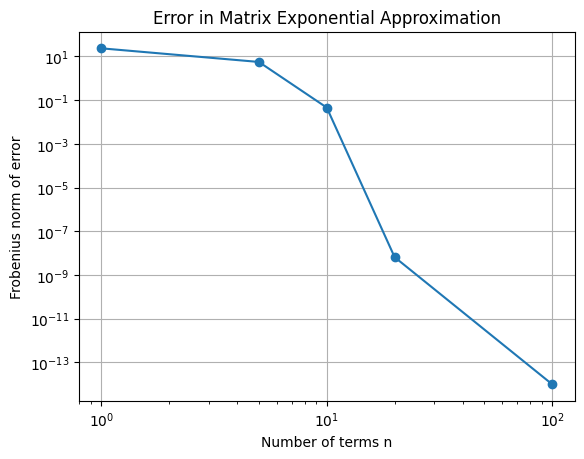

In [116]:
# Plot the error
plt.figure()  # Create a new figure, optional parameters can be passed to customize the figure (e.g., figsize=(8, 6), dpi=100, etc.)
plt.plot(n_values, errors, marker='o')  # plot with markers for better visibility, optional parameters can be passed to customize the plot (e.g., color='blue', linestyle='--', etc.)
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Number of terms n')  # Optional parameters can be passed to customize the label (e.g., fontsize=14, color='red', etc.)
plt.ylabel('Frobenius norm of error')  # Optional parameters can be passed to customize the label (e.g., fontsize=14, color='red', etc.)
plt.title('Error in Matrix Exponential Approximation')  # Optional parameters can be passed to customize the title (e.g., fontsize=16, color='green', etc.)
plt.grid(True)  # Optional parameters can be passed to customize the grid (e.g., linestyle='--', color='gray', etc.)
# If there is a legend, it can be added with plt.legend(), optional parameters can be passed to customize the legend (e.g., fontsize=12, loc='upper right', etc.)
plt.show()

It is also useful to know other important matrix operations, such as the trace, determinant, the inverse, and how to find eigenvalues and eigenvectors.

The trace of a matrix is the sum of its diagonal elements, and can be computed using `np.trace()`.

In [117]:
# Trace of a matrix
trace_A = np.trace(A)
print("Trace of A =", trace_A)

Trace of A = (2+0j)


The determinant of a matrix can be computed using `np.linalg.det()`.

In [118]:
# Determinant of a matrix
det_A = np.linalg.det(A)
print("Determinant of A =", det_A)

Determinant of A = (-3-3j)


The inverse of a matrix can be computed using `np.linalg.inv()`, provided the matrix is invertible.
Mathematically, a matrix $A$ is invertible if there exists a matrix $B$ such that $AB = BA = I$, where $I$ is the identity matrix.

In [119]:
# Inverse of a matrix
inv_A = np.linalg.inv(A)
print("Inverse of A =\n", inv_A)
# Verify that A * A_inv = I
identity_check = A @ inv_A
print("A * A_inv =\n", identity_check)

Inverse of A =
 [[ 0.        +0.j          0.        -0.33333333j]
 [ 0.5       +0.5j        -0.33333333+0.33333333j]]
A * A_inv =
 [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


Eigenvalues and eigenvectors can be computed using `np.linalg.eig()`.
As a reminder, for a square matrix $A$, an eigenvector $v$ and its corresponding eigenvalue $\lambda$ satisfy the equation $Av = \lambda v$.

In [120]:
# Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)
print("Eigenvalues of A =", eigenvalues)
print("Eigenvectors of A =\n", eigenvectors)

Eigenvalues of A = [ 3.12132034+0.70710678j -1.12132034-0.70710678j]
Eigenvectors of A =
 [[ 0.7295812 +0.j         -0.21559176+0.34188249j]
 [ 0.15110121+0.66699303j  0.91467839+0.j        ]]


## Exercise 5: Simulating a Simple Quantum Circuit with NumPy

#### Objective
Implement a simple quantum circuit using NumPy to:
1. Create a 2-qubit state \(|00\rangle\).
2. Apply a Hadamard gate to the first qubit and a CNOT gate with the first qubit as control.
3. Compute the final state vector.
4. (Optional) Visualize the state on the Bloch sphere.

In [121]:
CNOT = np.kron(np.dot(ket0, ket0.conj().T), np.identity(2)) + np.kron(np.dot(ket1, ket1.conj().T), X)
zero_zero = np.kron(ket0, ket0)
intermediate_state_1 = np.kron(H, np.identity(ket0.shape[0])) @ zero_zero
final_state = CNOT @ intermediate_state_1
print(final_state)

[[0.70710678+0.j]
 [0.        +0.j]
 [0.        +0.j]
 [0.70710678+0.j]]
